# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("mosaic/*"))


# print number of images in each dataset
print('There are %d total human images.' % len(human_files))

There are 277 total human images.


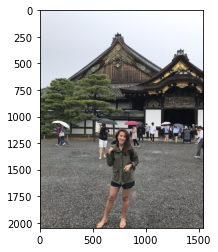

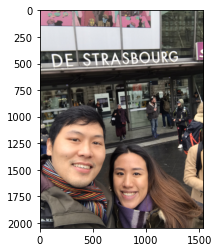

In [3]:
#View the sample human photos.
import random
from PIL import Image
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

for img in random.sample(list(human_files), 2): 
#open and display input image
    image = Image.open(img) #img_path
    plt.imshow(image)
    plt.show()

In [ ]:

  
# Opens a image in RGB mode 
im = Image.open(r"C:\Users\Admin\Pictures\geeks.png") 
  
# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size 
  
# Setting the points for cropped image 
left = 5
top = height / 4
right = 164
bottom = 3 * height / 4
  
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
  
# Shows the image in image viewer 
im1.show() 

In [35]:
from PIL import Image
import pathlib
maxsize = (512, 512)
for input_img_path in pathlib.Path("mosaic2").iterdir():
    output_img_path = str(input_img_path).replace("mosaic2","output1")
    with Image.open(input_img_path) as im:
        width, height = im.size 
        xcentre=width/2
        ycentre=height/2
        # Setting the points for cropped image 
        left = width/10
        top = height/10
        right = width -width/10
        bottom = height-height/10

        # Cropped image of above dimension 
        # (It will not change orginal image) 
        im1 = im.crop((left, top, right, bottom))
        
        im1.save(output_img_path, "JPEG")
        print(f"processing file {input_img_path} done...")

processing file mosaic2\02138295-f112-48ee-be9b-09124c13870c.jpg done...
processing file mosaic2\03bbc9fb-9fca-47aa-afac-21105fea04d0.jpg done...
processing file mosaic2\0933cf79-204e-4e31-9205-f3f2f8fa4a89.jpg done...
processing file mosaic2\098c648d-1596-4418-bc2a-e0d2ebe38613.jpg done...
processing file mosaic2\13be311f-78cb-4cfe-9e3c-e720bd015470.jpg done...
processing file mosaic2\1e67bd52-265a-4d33-a93e-d495eeebfdd9.jpg done...
processing file mosaic2\21a0bb2a-792b-4537-bc65-17bde18db60d.jpg done...
processing file mosaic2\24d29ee5-4008-4529-8be2-dd3d54bf22b3.jpg done...
processing file mosaic2\294ba413-bcda-4027-8181-186c2613b724.jpg done...
processing file mosaic2\2ad261f7-344a-480e-8e64-7f33e853407c.jpg done...
processing file mosaic2\2d853c1a-99a6-494e-b90e-8a54b7b0c244.jpg done...
processing file mosaic2\2ea2a318-9953-4e41-a3d4-08964d6557d9.jpg done...
processing file mosaic2\2f2f0571-5b42-4475-ae5a-8337aca0dd73.jpg done...
processing file mosaic2\30925d0b-32b5-4321-b865-7f8

processing file mosaic2\IMG_0937.JPEG done...
processing file mosaic2\IMG_0992.JPEG done...
processing file mosaic2\IMG_1028.JPEG done...
processing file mosaic2\IMG_1031.JPEG done...
processing file mosaic2\IMG_1187.JPEG done...
processing file mosaic2\IMG_1207.JPEG done...
processing file mosaic2\IMG_1395.JPEG done...
processing file mosaic2\IMG_1408.JPEG done...
processing file mosaic2\IMG_1441.JPEG done...
processing file mosaic2\IMG_1451.JPEG done...
processing file mosaic2\IMG_1455.JPEG done...
processing file mosaic2\IMG_1459.JPEG done...
processing file mosaic2\IMG_1474.JPEG done...
processing file mosaic2\IMG_1476.JPEG done...
processing file mosaic2\IMG_1483.JPEG done...
processing file mosaic2\IMG_1501.JPEG done...
processing file mosaic2\IMG_1554.JPEG done...
processing file mosaic2\IMG_1591.JPEG done...
processing file mosaic2\IMG_1821.JPEG done...
processing file mosaic2\IMG_1824.JPEG done...
processing file mosaic2\IMG_1856.JPEG done...
processing file mosaic2\IMG_1885.J

In [37]:
from PIL import Image
import pathlib
maxsize = (256, 256)
for input_img_path in pathlib.Path("output1").iterdir():
    output_img_path = str(input_img_path).replace("output1","output2")
    with Image.open(input_img_path) as im:
        im.thumbnail(maxsize)
        im.save(output_img_path, "JPEG", dpi=(300,300))
        print(f"processing file {input_img_path} done...")

processing file output1\02138295-f112-48ee-be9b-09124c13870c.jpg done...
processing file output1\03bbc9fb-9fca-47aa-afac-21105fea04d0.jpg done...
processing file output1\0933cf79-204e-4e31-9205-f3f2f8fa4a89.jpg done...
processing file output1\098c648d-1596-4418-bc2a-e0d2ebe38613.jpg done...
processing file output1\13be311f-78cb-4cfe-9e3c-e720bd015470.jpg done...
processing file output1\1e67bd52-265a-4d33-a93e-d495eeebfdd9.jpg done...
processing file output1\21a0bb2a-792b-4537-bc65-17bde18db60d.jpg done...
processing file output1\24d29ee5-4008-4529-8be2-dd3d54bf22b3.jpg done...
processing file output1\294ba413-bcda-4027-8181-186c2613b724.jpg done...
processing file output1\2ad261f7-344a-480e-8e64-7f33e853407c.jpg done...
processing file output1\2d853c1a-99a6-494e-b90e-8a54b7b0c244.jpg done...
processing file output1\2ea2a318-9953-4e41-a3d4-08964d6557d9.jpg done...
processing file output1\2f2f0571-5b42-4475-ae5a-8337aca0dd73.jpg done...
processing file output1\30925d0b-32b5-4321-b865-7f8

processing file output1\IMG_1441.JPEG done...
processing file output1\IMG_1451.JPEG done...
processing file output1\IMG_1455.JPEG done...
processing file output1\IMG_1459.JPEG done...
processing file output1\IMG_1474.JPEG done...
processing file output1\IMG_1476.JPEG done...
processing file output1\IMG_1483.JPEG done...
processing file output1\IMG_1501.JPEG done...
processing file output1\IMG_1554.JPEG done...
processing file output1\IMG_1591.JPEG done...
processing file output1\IMG_1821.JPEG done...
processing file output1\IMG_1824.JPEG done...
processing file output1\IMG_1856.JPEG done...
processing file output1\IMG_1885.JPEG done...
processing file output1\IMG_1932.JPEG done...
processing file output1\IMG_1968.JPEG done...
processing file output1\IMG_2006.JPEG done...
processing file output1\IMG_2034.JPEG done...
processing file output1\IMG_2055.JPEG done...
processing file output1\IMG_2059.JPEG done...
processing file output1\IMG_2390.JPEG done...
processing file output1\IMG_2426.J

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 2


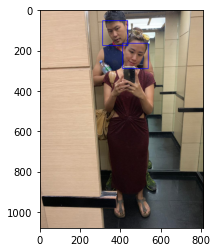

In [7]:

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[13])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

if len(faces)>1:
    # to crop out image including both the faces. 
# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [8]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [10]:
from tqdm import tqdm
human_files_short = human_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
# run the function face_detector to check number of True values. 

#define first row
k=0
number_human_face=0
#create loop to run all rows, since human and dog are using 100 images 
for k in tqdm(range(len(human_files_short))):
    if face_detector(human_files_short[k]) == True:
        number_human_face+=1

    k+=1    
percent_human=(number_human_face/len(human_files_short))*100
print('human faces ',percent_human, "%")


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [01:47<00:00,  1.08s/it]

human faces  85.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [303]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

# extract pre-trained face detector
face_cascade2 = cv2.CascadeClassifier('lbpcascades/lbpcascade_frontalface.xml')

In [304]:
# returns "True" if face is detected in image stored at img_path
def face_detector2(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces2 = face_cascade2.detectMultiScale(gray)
    return len(faces2) > 0

In [305]:
#define first row
k=0
number_human_face=0
number_dog_face=0
#create loop to run all rows, since human and dog are using 100 images 
for k in tqdm(range(len(human_files_short))):
    if face_detector2(human_files_short[k]):
        number_human_face+=1
    if face_detector2(dog_files_short[k]):
        number_dog_face+=1
    k+=1    
percent_human=(number_human_face/len(human_files_short))*100
print('human faces ',percent_human, "%")
percent_dog=(number_dog_face/len(dog_files_short))*100
print('dog faces ',percent_dog, "%")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 16.98it/s]

human faces  92.0 %
dog faces  31.0 %


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'input'

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [306]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [307]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [308]:
import io
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import numpy as np

train_on_gpu = torch.cuda.is_available()
    #Check if available to train on gpu
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
 
    
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path   
    Args:
        img_path: path to an image        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''    
    #open image file 
    input_image = Image.open(img_path)
    #preprocess function defined which transform the image so that images are converted to tensors, 
    #all consistent size and normalised accordingly
    preprocess = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    input_tensor = preprocess(input_image) #create input tensor by feeding input image with the preprocess function.
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    with torch.no_grad(): #no back propogation altering the gradients. Keeping the model attributes the same. 
        output = VGG16(input_batch) #Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
    # print(output)
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    # print(torch.nn.functional.softmax(output[0], dim=0))           

    #extract the index with the maximum value in the second dimension which has 0:999 classes of dogs
    xx,predicted = output.max(dim=1)    #xx is the value, predicted is the class index

    #print('Pre-trained model predicts an index of', predicted.item())
    return predicted.item()
    

CUDA is not available.  Training on CPU ...


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [309]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    # check prediction of the image
    index_predict=VGG16_predict(img_path)
    
#     #check if output index is between 151 and 268. If yes, True, False for No. 
     
    if index_predict >151 and index_predict<268:
        return True
    else:
        return False

In [310]:
#just to test it out
dog_detector(human_files[0])


False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

detect a dog in human_files 0.0 %, detect a dog in dog_files 94.0 %

In [311]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
nbr_human=0
nbr_dog=0
i=0
for i in tqdm(range(len(human_files_short))):
    if dog_detector(human_files_short[i]):
        nbr_human+=1
    if dog_detector(dog_files_short[i]):
        nbr_dog+=1
    i+=1
     
percent_human=(nbr_human/len(human_files_short))*100
print('detect a dog in human_files',percent_human, "%")
percent_dog=(nbr_dog/len(dog_files_short))*100
print('detect a dog in dog_files',percent_dog, "%")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:12<00:00,  1.39it/s]

detect a dog in human_files 0.0 %
detect a dog in dog_files 95.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [312]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### test the Inceptionv3 model

import torch
import torchvision.models as models

# define inception_v3 model
inceptionv3 = models.inception_v3(pretrained=True)
inceptionv3.eval()
# check if CUDA is available
#use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
#if use_cuda:
#    inceptionv3 = inceptionv3.cuda()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [313]:
train_on_gpu = torch.cuda.is_available()
    #Check if available to train on gpu
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
 
    
def inceptionv3_predict(img_path):
  
    #open image file 
    input_image = Image.open(img_path)
    #preprocess function defined which transform the image so that images are converted to tensors, 
    #all consistent size and normalised accordingly
    preprocess = transforms.Compose([transforms.Resize(299),transforms.CenterCrop(299),transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    with torch.no_grad(): #no back propogation altering the gradients. Keeping the model attributes the same. 
        output = inceptionv3(input_batch)        

    #extract the index with the maximum value in the second dimension which has 0:999 classes of dogs
    xx,predicted = output.max(dim=1)

    return predicted.item()
    

CUDA is not available.  Training on CPU ...


In [314]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector2(img_path):
    ## TODO: Complete the function.
    # check prediction of the image
    index_predict=inceptionv3_predict(img_path)
    
#     #check if output index is between 151 and 268. If yes, True, False for No. 
     
    if index_predict >151 and index_predict<268:
        return True
    else:
        return False

In [315]:
x=Image.open(dog_files_short[50])
preprocess = transforms.Compose([transforms.Resize(299),transforms.CenterCrop(299),transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
input_tensor=preprocess(x)
input_batch = input_tensor.unsqueeze(0)
with torch.no_grad(): #no back propogation altering the gradients. Keeping the model attributes the same. 
    output = inceptionv3(input_batch) 

In [316]:
output

tensor([[ 1.3360e+00,  2.0092e-01, -9.5480e-02,  4.3526e-01,  2.6379e-01,
          6.2995e-01, -2.5067e-01, -7.4211e-02, -8.0464e-01, -1.5328e-02,
         -8.0506e-01, -5.8696e-01, -2.3704e-01, -1.6575e-01,  3.0165e-01,
         -9.9964e-01, -5.2787e-01, -5.8024e-01,  2.8647e-01, -4.4553e-01,
         -3.5758e-01, -1.0594e+00,  1.1429e-02, -3.7623e-01, -1.2269e-01,
         -5.7160e-01,  5.8903e-02, -5.9574e-01,  5.5015e-03,  1.5897e-01,
         -3.8086e-01, -3.6539e-01, -1.8732e-01, -2.5193e-02, -1.0256e+00,
         -5.3878e-01,  5.3465e-05,  3.6106e-01,  4.2448e-02, -1.2286e-01,
          1.5350e-01,  3.6934e-02,  6.9781e-01,  1.0114e-01, -3.4729e-02,
         -5.1190e-01,  8.6679e-01, -3.7194e-01,  2.1786e-01, -3.6786e-02,
         -6.2676e-01, -3.2465e-01,  2.7662e-02, -6.1748e-02, -4.1432e-01,
          1.5728e-01, -2.7896e-01,  2.2275e-01,  3.4888e-01, -6.1028e-01,
          2.7571e-01, -6.0972e-01, -3.9783e-01, -3.6988e-01, -7.0124e-01,
         -3.5595e-01, -3.7616e-01,  2.

In [317]:
dog_detector2(human_files_short[50])

False

In [318]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
nbr_human=0
nbr_dog=0
i=0
for i in tqdm(range(len(human_files_short))):
    if dog_detector2(human_files_short[i]):
        nbr_human+=1
    if dog_detector2(dog_files_short[i]):
        nbr_dog+=1
    i+=1
     
percent_human=(nbr_human/len(human_files_short))*100
print('detect a dog in human_files',percent_human, "%")
percent_dog=(nbr_dog/len(dog_files_short))*100
print('detect a dog in dog_files',percent_dog, "%")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.02it/s]

detect a dog in human_files 0.0 %
detect a dog in dog_files 96.0 %


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [86]:
import os
from random import shuffle
from __future__ import print_function, division
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision import transforms, utils

### TODO: Write data loaders for training, validation, and test sets
# define training, test and validation data directories, if on udacity: use /data/....
train_dir = 'dogImages/train'
valid_dir = 'dogImages/valid'
test_dir = 'dogImages/test'

standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
#define transform criterias
train_transforms = transforms.Compose([transforms.Resize(size=256),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       standard_normalization])
validTest_transforms = transforms.Compose([transforms.Resize(size=256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           standard_normalization])

#create the transformed images into tensors datasets
datatrain = datasets.ImageFolder(train_dir, train_transforms)
datavalid = datasets.ImageFolder(valid_dir, validTest_transforms)
datatest = datasets.ImageFolder(test_dir, validTest_transforms)

#prepare data loaders for each dataset which will be used to feed into the model for batch training, test and validation.
#training loader
train_loader = torch.utils.data.DataLoader(datatrain,batch_size=32,shuffle=True,num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,batch_size=32,shuffle=True,num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,batch_size=32,shuffle=True,num_workers=0)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:The images are resized to 256 pixels and centre cropped 224 pixels. If I crop before resize, I might not caputre all the key feature, thus it is crucial to resize and crop after. 

Looking from the sample images on dogimages. The photo of the dogs have their heads being captured in the image and sometimes their body or head is nor orientated right up thus I used a randomrotation. Sometimes the body and head is oiriented from left to right instead of right to left, thus a horizontal random flip is used. 

Image augmentation will create randomness to the dataset created, prevents overfitting, thus giving better overall performance for prediction. Since validation and test data will be used for validation and test check, no randomhorizontal flip or rotation was used.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [87]:
#examples, need to deep dive in detals all each parameter mean and the arguments
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):      #initialise class Net and nn.Module as super initialise the parent class too
        super(Net, self).__init__()
        #define neural network parameters for layers
        # 1 input image with 3 input channel, 16 output channels, 3x3 square convolution
        ## convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3,padding=1) # 1 layer of padding with 3 by 3 filter to retain information in the image. 
        self.conv2 = nn.Conv2d(16, 32, 3,padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)          # max pooling layer
        self.fc1 = nn.Linear(64* 28* 28, 1024) #to test
        # dropout layer (p=0.25) #doest matter where its placed as initializing all the different layers, sequence are all done on the forward function
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(1024,133)        
# to define each layer how they interact with each other, input x produce output x for each input/output layers defined.
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) #max pooling with a filter of 2 by 2. 
        x=self.dropout(x)
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x=self.dropout(x)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x=self.dropout(x)
#       print(x.shape) to check the shape
        x=x.view(-1,64*28*28)     #-1 suggests "any size". So it could be 1, 12, 92, 15295...etc
        x=self.dropout(x)
        x = F.relu(self.fc1(x))
        x=self.dropout(x)            # feed through dropout layer. 
        x = self.fc2(x)
        return x
 
#-#-# You do NOT have to modify the code below this line. #-#-#
model_scratch = Net()   # instantiate the CNN
# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:  # move tensors to GPU if CUDA is available
    model_scratch.cuda()    
print(model_scratch)    

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=1024, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=1024, out_features=133, bias=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ Output classification would be 133 different breed of dogs thus 133 for final linear neural network output. Input channels is 3 as for every image there is R,B,G images fed at a time unless its greyscale images. Thus nn.Conv2d(3,6,3) for singe input 6 outputs and filter/kernel of 3*3. The smaller filter size of 3* at the first layer would be useful to extract all the features present in the picture. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [5]:
import torch.optim as optim
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
# optimizer optimizes the weights to improve and reduce the loss, ca try optim.Adam, best to use decaying learning rate
### TODO: select optimizer #using torch optimizer of SGD (stoichastic gradient descent) for the model's parameters with a learning rate of 0.01. 
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [88]:
from tqdm import tqdm
              
# the following import is required for training to be robust to truncated images called transfer learning.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders1, loaders2, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    old_valid_loss = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train
        
         # Iterate over data.
#         for inputs, labels in dataloaders[phase]:
        for batch_idx, (data, target) in tqdm(enumerate(loaders1)):
        #data,target in iter(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
        
            ## find the loss and update the model parameters accordingly
            #difference between output and target is the loss
            # zero the parameter gradients after each batch data
            optimizer.zero_grad()
            
# forward
            #predicted outputs
            outputs = model(data)
          #  _, preds = torch.max(outputs, 1)
            #batch loss is calculated using criterion
            loss = criterion(outputs, target)

# backward + optimize only in training phase
            #back propogate the loss
            loss.backward()
            # adjust the weights
            optimizer.step()
            
            #what does this mean?
            #train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            ## update the total of train loss after each batch
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        #data is input, output is prediction, 
        for batch_idx, (data, target) in tqdm(enumerate(loaders2)):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
           # forward pass: compute predicted outputs by passing input data to the model
            outputs = model(data)
            
            #batch loss is calculated using criterion
            loss = criterion(outputs, target)
            
             ## update the total of validation loss after each batch
            valid_loss += loss.item()*data.size(0)
            
        #calculate the average train_loss and valid_loss
        train_loss=train_loss/len(train_loader)
        valid_loss=valid_loss/len(valid_loader)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        #new valid loss if its less than the old valid loss, save the model and display the changes from old to new.
        if valid_loss<old_valid_loss:
            #save model with valid loss
            torch.save(model.state_dict(),save_path)
            
            print('Validation loss has decreased ({:.6f} ======> {:.6f}). Saving model ....'.format
                  (old_valid_loss,valid_loss))
            #the retained valid loss will be the new value. 
            old_valid_loss=valid_loss
              
    # return trained model
    return model

In [323]:
# train the model
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch = train(15, train_loader, valid_loader, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

209it [12:43,  3.65s/it]
27it [00:51,  1.90s/it]


Epoch: 1 	Training Loss: 156.173691 	Validation Loss: 150.936273


0it [00:00, ?it/s]

Validation loss has decreased (inf ======> 150.936273). Saving model ....


209it [11:48,  3.39s/it]
27it [00:49,  1.82s/it]


Epoch: 2 	Training Loss: 155.841713 	Validation Loss: 150.690014


0it [00:00, ?it/s]

Validation loss has decreased (150.936273 ======> 150.690014). Saving model ....


209it [11:41,  3.36s/it]
27it [00:50,  1.86s/it]


Epoch: 3 	Training Loss: 155.533163 	Validation Loss: 150.413614


0it [00:00, ?it/s]

Validation loss has decreased (150.690014 ======> 150.413614). Saving model ....


209it [11:37,  3.34s/it]
27it [00:51,  1.92s/it]


Epoch: 4 	Training Loss: 155.176329 	Validation Loss: 150.092739


0it [00:00, ?it/s]

Validation loss has decreased (150.413614 ======> 150.092739). Saving model ....


209it [11:43,  3.37s/it]
27it [00:50,  1.87s/it]


Epoch: 5 	Training Loss: 154.731250 	Validation Loss: 149.689256


0it [00:00, ?it/s]

Validation loss has decreased (150.092739 ======> 149.689256). Saving model ....


209it [11:44,  3.37s/it]
27it [00:49,  1.85s/it]


Epoch: 6 	Training Loss: 154.174836 	Validation Loss: 149.135909


0it [00:00, ?it/s]

Validation loss has decreased (149.689256 ======> 149.135909). Saving model ....


209it [11:41,  3.36s/it]
27it [00:52,  1.95s/it]


Epoch: 7 	Training Loss: 153.303044 	Validation Loss: 148.301045


0it [00:00, ?it/s]

Validation loss has decreased (149.135909 ======> 148.301045). Saving model ....


209it [11:50,  3.40s/it]
27it [00:59,  2.21s/it]


Epoch: 8 	Training Loss: 152.052216 	Validation Loss: 146.989263


0it [00:00, ?it/s]

Validation loss has decreased (148.301045 ======> 146.989263). Saving model ....


209it [13:35,  3.90s/it]
27it [00:58,  2.16s/it]


Epoch: 9 	Training Loss: 150.105491 	Validation Loss: 145.216653


0it [00:00, ?it/s]

Validation loss has decreased (146.989263 ======> 145.216653). Saving model ....


209it [13:33,  3.89s/it]
27it [00:59,  2.20s/it]


Epoch: 10 	Training Loss: 147.552482 	Validation Loss: 143.405337


0it [00:00, ?it/s]

Validation loss has decreased (145.216653 ======> 143.405337). Saving model ....


209it [13:32,  3.89s/it]
27it [01:00,  2.23s/it]


Epoch: 11 	Training Loss: 145.156966 	Validation Loss: 141.899378


0it [00:00, ?it/s]

Validation loss has decreased (143.405337 ======> 141.899378). Saving model ....


209it [13:33,  3.89s/it]
27it [00:59,  2.21s/it]


Epoch: 12 	Training Loss: 143.116215 	Validation Loss: 141.355974


0it [00:00, ?it/s]

Validation loss has decreased (141.899378 ======> 141.355974). Saving model ....


209it [13:38,  3.92s/it]
27it [01:00,  2.25s/it]


Epoch: 13 	Training Loss: 141.611975 	Validation Loss: 140.784861


0it [00:00, ?it/s]

Validation loss has decreased (141.355974 ======> 140.784861). Saving model ....


209it [09:11,  2.64s/it]
27it [00:30,  1.13s/it]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 140.064317 	Validation Loss: 140.904268


209it [07:35,  2.18s/it]
27it [00:35,  1.32s/it]


Epoch: 15 	Training Loss: 138.997178 	Validation Loss: 140.567768
Validation loss has decreased (140.784861 ======> 140.567768). Saving model ....


In [324]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [89]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [325]:
# call test function    
test(test_loader, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.503832


Test Accuracy:  4% (37/836)


In [6]:
train_loader = torch.utils.data.DataLoader(datatrain,batch_size=64,shuffle=True,num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,batch_size=64,shuffle=True,num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,batch_size=64,shuffle=True,num_workers=0)

In [9]:
# train the model
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch = train(15, train_loader, valid_loader, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

105it [08:27,  4.84s/it]
14it [00:45,  3.26s/it]


Epoch: 1 	Training Loss: 311.107953 	Validation Loss: 291.454658


0it [00:00, ?it/s]

Validation loss has decreased (inf ======> 291.454658). Saving model ....


105it [09:42,  5.54s/it]
14it [00:40,  2.88s/it]


Epoch: 2 	Training Loss: 310.783303 	Validation Loss: 291.283203


0it [00:00, ?it/s]

Validation loss has decreased (291.454658 ======> 291.283203). Saving model ....


105it [08:24,  4.80s/it]
14it [00:36,  2.60s/it]


Epoch: 3 	Training Loss: 310.563721 	Validation Loss: 291.105183


0it [00:00, ?it/s]

Validation loss has decreased (291.283203 ======> 291.105183). Saving model ....


105it [08:06,  4.63s/it]
14it [00:37,  2.70s/it]


Epoch: 4 	Training Loss: 310.348820 	Validation Loss: 290.928572


0it [00:00, ?it/s]

Validation loss has decreased (291.105183 ======> 290.928572). Saving model ....


105it [08:22,  4.79s/it]
14it [00:36,  2.64s/it]


Epoch: 5 	Training Loss: 310.115348 	Validation Loss: 290.747242


0it [00:00, ?it/s]

Validation loss has decreased (290.928572 ======> 290.747242). Saving model ....


105it [10:11,  5.82s/it]
14it [00:50,  3.61s/it]


Epoch: 6 	Training Loss: 309.876282 	Validation Loss: 290.555465


0it [00:00, ?it/s]

Validation loss has decreased (290.747242 ======> 290.555465). Saving model ....


105it [09:23,  5.36s/it]
14it [00:39,  2.83s/it]


Epoch: 7 	Training Loss: 309.656653 	Validation Loss: 290.362053


0it [00:00, ?it/s]

Validation loss has decreased (290.555465 ======> 290.362053). Saving model ....


105it [08:41,  4.97s/it]
14it [00:40,  2.86s/it]


Epoch: 8 	Training Loss: 309.402146 	Validation Loss: 290.160101


0it [00:00, ?it/s]

Validation loss has decreased (290.362053 ======> 290.160101). Saving model ....


105it [09:55,  5.67s/it]
14it [00:50,  3.61s/it]


Epoch: 9 	Training Loss: 309.156864 	Validation Loss: 289.949505


0it [00:00, ?it/s]

Validation loss has decreased (290.160101 ======> 289.949505). Saving model ....


105it [09:48,  5.61s/it]
14it [00:42,  3.04s/it]


Epoch: 10 	Training Loss: 308.876494 	Validation Loss: 289.731677


0it [00:00, ?it/s]

Validation loss has decreased (289.949505 ======> 289.731677). Saving model ....


105it [08:56,  5.11s/it]
14it [00:47,  3.37s/it]


Epoch: 11 	Training Loss: 308.582258 	Validation Loss: 289.492833


0it [00:00, ?it/s]

Validation loss has decreased (289.731677 ======> 289.492833). Saving model ....


105it [10:13,  5.85s/it]
14it [00:41,  2.99s/it]


Epoch: 12 	Training Loss: 308.291054 	Validation Loss: 289.238566


0it [00:00, ?it/s]

Validation loss has decreased (289.492833 ======> 289.238566). Saving model ....


105it [08:34,  4.90s/it]
14it [00:39,  2.79s/it]


Epoch: 13 	Training Loss: 307.956765 	Validation Loss: 288.948208


0it [00:00, ?it/s]

Validation loss has decreased (289.238566 ======> 288.948208). Saving model ....


105it [08:48,  5.03s/it]
14it [00:37,  2.69s/it]


Epoch: 14 	Training Loss: 307.555996 	Validation Loss: 288.611329


0it [00:00, ?it/s]

Validation loss has decreased (288.948208 ======> 288.611329). Saving model ....


105it [09:55,  5.67s/it]
14it [00:51,  3.65s/it]


Epoch: 15 	Training Loss: 307.077047 	Validation Loss: 288.193166
Validation loss has decreased (288.611329 ======> 288.193166). Saving model ....


In [11]:
# call test function    
test(test_loader, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.836574


Test Accuracy:  2% (22/836)


In [12]:
train_loader = torch.utils.data.DataLoader(datatrain,batch_size=16,shuffle=True,num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,batch_size=16,shuffle=True,num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,batch_size=16,shuffle=True,num_workers=0)

In [13]:
# train the model
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch = train(15, train_loader, valid_loader, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

418it [09:26,  1.35s/it]
53it [00:39,  1.35it/s]


Epoch: 1 	Training Loss: 76.844035 	Validation Loss: 75.464799


0it [00:00, ?it/s]

Validation loss has decreased (inf ======> 75.464799). Saving model ....


418it [10:10,  1.46s/it]
53it [00:33,  1.60it/s]


Epoch: 2 	Training Loss: 75.587834 	Validation Loss: 73.996380


0it [00:00, ?it/s]

Validation loss has decreased (75.464799 ======> 73.996380). Saving model ....


418it [09:58,  1.43s/it]
53it [00:39,  1.34it/s]


Epoch: 3 	Training Loss: 73.553762 	Validation Loss: 72.656424


0it [00:00, ?it/s]

Validation loss has decreased (73.996380 ======> 72.656424). Saving model ....


418it [10:49,  1.55s/it]
53it [00:43,  1.21it/s]


Epoch: 4 	Training Loss: 71.951595 	Validation Loss: 72.075374


0it [00:00, ?it/s]

Validation loss has decreased (72.656424 ======> 72.075374). Saving model ....


418it [10:53,  1.56s/it]
53it [00:38,  1.38it/s]


Epoch: 5 	Training Loss: 70.800605 	Validation Loss: 71.823158


0it [00:00, ?it/s]

Validation loss has decreased (72.075374 ======> 71.823158). Saving model ....


418it [09:50,  1.41s/it]
53it [00:32,  1.61it/s]


Epoch: 6 	Training Loss: 69.542447 	Validation Loss: 71.435582


0it [00:00, ?it/s]

Validation loss has decreased (71.823158 ======> 71.435582). Saving model ....


418it [09:41,  1.39s/it]
53it [00:33,  1.58it/s]


Epoch: 7 	Training Loss: 68.245738 	Validation Loss: 70.228445


0it [00:00, ?it/s]

Validation loss has decreased (71.435582 ======> 70.228445). Saving model ....


418it [10:30,  1.51s/it]
53it [00:54,  1.03s/it]


Epoch: 8 	Training Loss: 66.851349 	Validation Loss: 70.184057


0it [00:00, ?it/s]

Validation loss has decreased (70.228445 ======> 70.184057). Saving model ....


418it [14:30,  2.08s/it]
53it [00:55,  1.04s/it]


Epoch: 9 	Training Loss: 65.526916 	Validation Loss: 69.689557


0it [00:00, ?it/s]

Validation loss has decreased (70.184057 ======> 69.689557). Saving model ....


418it [14:27,  2.07s/it]
53it [00:55,  1.05s/it]
0it [00:00, ?it/s]

Epoch: 10 	Training Loss: 64.363363 	Validation Loss: 69.992117


418it [13:43,  1.97s/it]
53it [00:58,  1.10s/it]


Epoch: 11 	Training Loss: 63.421123 	Validation Loss: 69.291316


0it [00:00, ?it/s]

Validation loss has decreased (69.689557 ======> 69.291316). Saving model ....


418it [15:18,  2.20s/it]
53it [01:02,  1.18s/it]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 62.307749 	Validation Loss: 70.124522


418it [14:57,  2.15s/it]
53it [01:04,  1.22s/it]
0it [00:00, ?it/s]

Epoch: 13 	Training Loss: 61.105002 	Validation Loss: 69.571398


418it [15:29,  2.22s/it]
53it [00:59,  1.13s/it]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 60.057801 	Validation Loss: 70.169043


418it [10:54,  1.57s/it]
53it [00:39,  1.33it/s]

Epoch: 15 	Training Loss: 58.848163 	Validation Loss: 70.502477


In [14]:
# call test function    
test(test_loader, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.417327


Test Accuracy:  5% (45/836)


<a id='step4'></a>
## Step 3b: Create a better model architect 

Accuracy level less than 10%, observed overfitting occured as training loss reduce but validation loss increase. Create a better model architect which is more simplified with less layers, less cycles, 

In [21]:
class Net2(nn.Module):

    def __init__(self):
        #initialise class Net and nn.Module as super initialise the parent class too
        super(Net2, self).__init__()
        #define neural network parameters for layers
        # 1 input image with 3 channel, 16 output channels, 3x3 square convolution
        # kernel
        ## convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # 1 layer of padding with 3 by 3 filter to retain information in the image. 
        self.pool = nn.MaxPool2d(2, 2)
        
        self.dropout = nn.Dropout(0.25)
        self.conv2 = nn.Conv2d(16, 32, 3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
    
        self.dropout = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(32, 64, 3,padding=1)
        # max pooling layer
        
        self.pool = nn.MaxPool2d(2, 2)
        # an affine operation: y = Wx + b
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64* 28* 28, 1024) #to test
        
#        self.fc1 = nn.Linear(128* 28* 28, 500)  # 6*6 from image dimension
        # dropout layer (p=0.25) #doest matter where its placed as initializing all the different layers, sequence are all done on the forward function

        self.fc2 = nn.Linear(1024,133)

        
# to define each layer how they interact with each other, input x produce output x for each input/output layers defined.
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) #max pooling with a filter of 2 by 2. 
        x=self.dropout(x)
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x=self.dropout(x)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x=self.dropout(x)
        # flatten
 #       x=x.flatten(1)
#        print(x.shape)
        #-1 suggests "any size". So it could be 1, 12, 92, 15295...etc
        x=x.view(-1,64*28*28)
        # feed through dropout layer. 
        x=self.dropout(x)
#        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x=self.dropout(x)
        x = self.fc2(x)
        return x

    
    
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch2 = Net2()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch2.cuda()
    
print(model_scratch2)    

Net2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=50176, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=133, bias=True)
)


use 32 bach size, vary the learning rate. 

In [31]:
train_loader = torch.utils.data.DataLoader(datatrain,batch_size=32,shuffle=True,num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,batch_size=32,shuffle=True,num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,batch_size=32,shuffle=True,num_workers=0)

In [32]:
# train the model2
optimizer_scratch = optim.SGD(model_scratch2.parameters(), lr=0.004)
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch2 = train(20, train_loader, valid_loader, model_scratch2, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch2.pt')

209it [12:20,  3.54s/it]
27it [00:55,  2.07s/it]


Epoch: 1 	Training Loss: 156.036867 	Validation Loss: 150.633047


0it [00:00, ?it/s]

Validation loss has decreased (inf ======> 150.633047). Saving model ....


209it [11:59,  3.44s/it]
27it [00:48,  1.81s/it]

Epoch: 2 	Training Loss: 155.163937 	Validation Loss: 149.538317



0it [00:00, ?it/s]

Validation loss has decreased (150.633047 ======> 149.538317). Saving model ....


209it [14:52,  4.27s/it]
27it [01:05,  2.43s/it]


Epoch: 3 	Training Loss: 152.809079 	Validation Loss: 146.172398


0it [00:00, ?it/s]

Validation loss has decreased (149.538317 ======> 146.172398). Saving model ....


209it [16:41,  4.79s/it]
27it [01:04,  2.39s/it]


Epoch: 4 	Training Loss: 147.602319 	Validation Loss: 142.849971


0it [00:00, ?it/s]

Validation loss has decreased (146.172398 ======> 142.849971). Saving model ....


209it [17:31,  5.03s/it]
27it [00:59,  2.21s/it]


Epoch: 5 	Training Loss: 144.112435 	Validation Loss: 141.770642


0it [00:00, ?it/s]

Validation loss has decreased (142.849971 ======> 141.770642). Saving model ....


209it [23:08,  6.64s/it]
27it [05:54, 13.13s/it]


Epoch: 6 	Training Loss: 141.620425 	Validation Loss: 141.343267


0it [00:00, ?it/s]

Validation loss has decreased (141.770642 ======> 141.343267). Saving model ....


209it [53:41, 15.42s/it]
27it [04:03,  9.03s/it]


Epoch: 7 	Training Loss: 139.533705 	Validation Loss: 140.876627


0it [00:00, ?it/s]

Validation loss has decreased (141.343267 ======> 140.876627). Saving model ....


209it [45:34, 13.08s/it]
27it [01:57,  4.35s/it]


Epoch: 8 	Training Loss: 137.553679 	Validation Loss: 140.527675


0it [00:00, ?it/s]

Validation loss has decreased (140.876627 ======> 140.527675). Saving model ....


209it [25:58,  7.46s/it]
27it [01:22,  3.06s/it]


Epoch: 9 	Training Loss: 135.479989 	Validation Loss: 140.122524


0it [00:00, ?it/s]

Validation loss has decreased (140.527675 ======> 140.122524). Saving model ....


209it [09:21,  2.69s/it]
27it [00:37,  1.38s/it]
0it [00:00, ?it/s]

Epoch: 10 	Training Loss: 133.519649 	Validation Loss: 140.794104


209it [08:49,  2.53s/it]
27it [00:37,  1.37s/it]


Epoch: 11 	Training Loss: 130.852510 	Validation Loss: 139.489794


0it [00:00, ?it/s]

Validation loss has decreased (140.122524 ======> 139.489794). Saving model ....


209it [09:22,  2.69s/it]
27it [00:38,  1.43s/it]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 128.208293 	Validation Loss: 140.211701


209it [08:24,  2.42s/it]
27it [00:31,  1.17s/it]


Epoch: 13 	Training Loss: 124.786052 	Validation Loss: 138.890563


0it [00:00, ?it/s]

Validation loss has decreased (139.489794 ======> 138.890563). Saving model ....


209it [07:52,  2.26s/it]
27it [00:31,  1.18s/it]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 121.443698 	Validation Loss: 139.230502


209it [07:56,  2.28s/it]
27it [00:35,  1.31s/it]
0it [00:00, ?it/s]

Epoch: 15 	Training Loss: 118.661176 	Validation Loss: 140.982225


209it [09:10,  2.64s/it]
27it [00:40,  1.51s/it]
0it [00:00, ?it/s]

Epoch: 16 	Training Loss: 115.542965 	Validation Loss: 142.254787


209it [08:59,  2.58s/it]
27it [00:35,  1.30s/it]
0it [00:00, ?it/s]

Epoch: 17 	Training Loss: 112.625834 	Validation Loss: 142.734414


209it [08:43,  2.50s/it]
27it [00:33,  1.23s/it]
0it [00:00, ?it/s]

Epoch: 18 	Training Loss: 109.086802 	Validation Loss: 145.696478


209it [08:55,  2.56s/it]
27it [00:37,  1.39s/it]
0it [00:00, ?it/s]

Epoch: 19 	Training Loss: 105.446755 	Validation Loss: 145.367024


209it [09:09,  2.63s/it]
27it [00:40,  1.51s/it]

Epoch: 20 	Training Loss: 101.611255 	Validation Loss: 147.109605


In [33]:
# call test function    
test(test_loader, model_scratch2, criterion_scratch, use_cuda)

Test Loss: 4.742517


Test Accuracy:  7% (63/836)


In [34]:
optimizer_scratch2 = optim.SGD(model_scratch2.parameters(), lr=0.005)

In [35]:
# train the model2
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch2 = train(20, train_loader, valid_loader, model_scratch, optimizer_scratch2, 
                      criterion_scratch, use_cuda, 'model_scratch2.pt')

209it [09:07,  2.62s/it]
27it [00:36,  1.35s/it]

Epoch: 1 	Training Loss: 113.507867 	Validation Loss: 138.393749



0it [00:00, ?it/s]

Validation loss has decreased (inf ======> 138.393749). Saving model ....


209it [08:50,  2.54s/it]
27it [00:36,  1.36s/it]
0it [00:00, ?it/s]

Epoch: 2 	Training Loss: 113.813361 	Validation Loss: 138.393752


209it [08:42,  2.50s/it]
27it [00:36,  1.35s/it]
0it [00:00, ?it/s]

Epoch: 3 	Training Loss: 113.623272 	Validation Loss: 138.393752


209it [08:39,  2.49s/it]
27it [00:35,  1.30s/it]
0it [00:00, ?it/s]

Epoch: 4 	Training Loss: 113.512245 	Validation Loss: 138.393750


209it [08:39,  2.48s/it]
27it [00:36,  1.37s/it]
0it [00:00, ?it/s]

Epoch: 5 	Training Loss: 113.752388 	Validation Loss: 138.393750


209it [08:42,  2.50s/it]
27it [00:36,  1.36s/it]
0it [00:00, ?it/s]

Epoch: 6 	Training Loss: 113.810649 	Validation Loss: 138.393750


209it [08:42,  2.50s/it]
27it [00:35,  1.33s/it]
0it [00:00, ?it/s]

Epoch: 7 	Training Loss: 113.483726 	Validation Loss: 138.393752


209it [08:16,  2.37s/it]
27it [00:34,  1.28s/it]
0it [00:00, ?it/s]

Epoch: 8 	Training Loss: 113.697528 	Validation Loss: 138.393752


209it [08:14,  2.36s/it]
27it [00:34,  1.29s/it]
0it [00:00, ?it/s]

Epoch: 9 	Training Loss: 113.654520 	Validation Loss: 138.393751


209it [08:04,  2.32s/it]
27it [00:31,  1.16s/it]
0it [00:00, ?it/s]

Epoch: 10 	Training Loss: 113.583387 	Validation Loss: 138.393752


209it [08:17,  2.38s/it]
27it [00:35,  1.30s/it]
0it [00:00, ?it/s]

Epoch: 11 	Training Loss: 113.622880 	Validation Loss: 138.393751


209it [08:29,  2.44s/it]
27it [00:35,  1.31s/it]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 113.808268 	Validation Loss: 138.393750


209it [08:20,  2.40s/it]
27it [00:34,  1.29s/it]
0it [00:00, ?it/s]

Epoch: 13 	Training Loss: 113.439987 	Validation Loss: 138.393751


209it [08:22,  2.40s/it]
27it [00:34,  1.27s/it]


Epoch: 14 	Training Loss: 113.748295 	Validation Loss: 138.393748


0it [00:00, ?it/s]

Validation loss has decreased (138.393749 ======> 138.393748). Saving model ....


209it [08:27,  2.43s/it]
27it [00:36,  1.36s/it]
0it [00:00, ?it/s]

Epoch: 15 	Training Loss: 113.635850 	Validation Loss: 138.393750


209it [08:22,  2.40s/it]
27it [00:31,  1.18s/it]
0it [00:00, ?it/s]

Epoch: 16 	Training Loss: 113.631490 	Validation Loss: 138.393754


209it [07:36,  2.18s/it]
27it [00:32,  1.20s/it]
0it [00:00, ?it/s]

Epoch: 17 	Training Loss: 113.656747 	Validation Loss: 138.393751


209it [08:35,  2.47s/it]
27it [00:36,  1.35s/it]
0it [00:00, ?it/s]

Epoch: 18 	Training Loss: 113.356157 	Validation Loss: 138.393751


209it [08:46,  2.52s/it]
27it [00:35,  1.32s/it]
0it [00:00, ?it/s]

Epoch: 19 	Training Loss: 113.908691 	Validation Loss: 138.393750


209it [08:24,  2.42s/it]
27it [00:32,  1.22s/it]

Epoch: 20 	Training Loss: 113.516767 	Validation Loss: 138.393754


In [38]:
# call test function    
test(test_loader, model_scratch2, criterion_scratch, use_cuda)

Test Loss: 4.515143


Test Accuracy:  5% (49/836)


test with 64 batch size

In [36]:
train_loader = torch.utils.data.DataLoader(datatrain,batch_size=64,shuffle=True,num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,batch_size=64,shuffle=True,num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,batch_size=64,shuffle=True,num_workers=0)

In [37]:
# train the model2
optimizer_scratch = optim.SGD(model_scratch2.parameters(), lr=0.004)
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch2 = train(15, train_loader, valid_loader, model_scratch2, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch2.pt')

105it [07:41,  4.40s/it]
14it [00:39,  2.79s/it]


Epoch: 1 	Training Loss: 230.413334 	Validation Loss: 278.779079


0it [00:00, ?it/s]

Validation loss has decreased (inf ======> 278.779079). Saving model ....


105it [08:11,  4.68s/it]
14it [00:40,  2.86s/it]


Epoch: 2 	Training Loss: 224.678258 	Validation Loss: 272.968554


0it [00:00, ?it/s]

Validation loss has decreased (278.779079 ======> 272.968554). Saving model ....


105it [08:42,  4.98s/it]
14it [00:43,  3.09s/it]
0it [00:00, ?it/s]

Epoch: 3 	Training Loss: 219.074764 	Validation Loss: 285.294166


105it [08:22,  4.78s/it]
14it [00:36,  2.59s/it]
0it [00:00, ?it/s]

Epoch: 4 	Training Loss: 214.757952 	Validation Loss: 281.771997


105it [07:19,  4.19s/it]
14it [00:36,  2.63s/it]
0it [00:00, ?it/s]

Epoch: 5 	Training Loss: 208.964507 	Validation Loss: 285.700221


105it [07:41,  4.40s/it]
14it [00:33,  2.42s/it]
0it [00:00, ?it/s]

Epoch: 6 	Training Loss: 202.902792 	Validation Loss: 293.400781


105it [07:22,  4.21s/it]
14it [00:40,  2.88s/it]
0it [00:00, ?it/s]

Epoch: 7 	Training Loss: 196.612792 	Validation Loss: 289.237285


105it [10:43,  6.13s/it]
14it [00:49,  3.52s/it]
0it [00:00, ?it/s]

Epoch: 8 	Training Loss: 191.149146 	Validation Loss: 315.605136


105it [11:12,  6.41s/it]
14it [00:48,  3.48s/it]
0it [00:00, ?it/s]

Epoch: 9 	Training Loss: 184.654362 	Validation Loss: 291.906147


105it [10:32,  6.02s/it]
14it [00:48,  3.47s/it]
0it [00:00, ?it/s]

Epoch: 10 	Training Loss: 176.885904 	Validation Loss: 304.905440


105it [10:39,  6.09s/it]
14it [00:49,  3.53s/it]
0it [00:00, ?it/s]

Epoch: 11 	Training Loss: 170.692266 	Validation Loss: 320.389901


105it [10:32,  6.03s/it]
14it [00:49,  3.52s/it]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 164.162311 	Validation Loss: 318.813188


105it [10:30,  6.01s/it]
14it [00:48,  3.48s/it]
0it [00:00, ?it/s]

Epoch: 13 	Training Loss: 156.925724 	Validation Loss: 321.543474


105it [10:37,  6.08s/it]
14it [00:48,  3.45s/it]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 148.940862 	Validation Loss: 326.202442


105it [10:38,  6.08s/it]
14it [00:48,  3.50s/it]

Epoch: 15 	Training Loss: 141.311492 	Validation Loss: 353.808453


In [38]:
# call test function    
test(test_loader, model_scratch2, criterion_scratch, use_cuda)

Test Loss: 5.838277


Test Accuracy:  5% (42/836)


In [39]:
train_loader = torch.utils.data.DataLoader(datatrain,batch_size=32,shuffle=True,num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,batch_size=32,shuffle=True,num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,batch_size=32,shuffle=True,num_workers=0)

In [40]:
# train the model2 with Adam
optimizer_scratch = optim.Adam(model_scratch2.parameters(), lr=0.004)
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch2 = train(20, train_loader, valid_loader, model_scratch2, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch2.pt')

209it [14:24,  4.14s/it]
27it [01:05,  2.43s/it]


Epoch: 1 	Training Loss: 314.681636 	Validation Loss: 150.685818


0it [00:00, ?it/s]

Validation loss has decreased (inf ======> 150.685818). Saving model ....


209it [17:30,  5.03s/it]
27it [01:04,  2.40s/it]


Epoch: 2 	Training Loss: 155.729017 	Validation Loss: 150.592582


0it [00:00, ?it/s]

Validation loss has decreased (150.685818 ======> 150.592582). Saving model ....


209it [11:04,  3.18s/it]
27it [00:39,  1.45s/it]


Epoch: 3 	Training Loss: 155.654115 	Validation Loss: 150.577652


0it [00:00, ?it/s]

Validation loss has decreased (150.592582 ======> 150.577652). Saving model ....


209it [12:15,  3.52s/it]
27it [00:36,  1.34s/it]


Epoch: 4 	Training Loss: 155.637974 	Validation Loss: 150.567733


0it [00:00, ?it/s]

Validation loss has decreased (150.577652 ======> 150.567733). Saving model ....


209it [12:41,  3.64s/it]
27it [00:33,  1.23s/it]


Epoch: 5 	Training Loss: 155.603605 	Validation Loss: 150.565126


0it [00:00, ?it/s]

Validation loss has decreased (150.567733 ======> 150.565126). Saving model ....


209it [12:31,  3.59s/it]
27it [00:37,  1.37s/it]
0it [00:00, ?it/s]

Epoch: 6 	Training Loss: 155.589074 	Validation Loss: 150.568108


209it [13:08,  3.77s/it]
27it [00:38,  1.42s/it]
0it [00:00, ?it/s]

Epoch: 7 	Training Loss: 155.582717 	Validation Loss: 150.565328


209it [13:01,  3.74s/it]
27it [00:34,  1.27s/it]
0it [00:00, ?it/s]

Epoch: 8 	Training Loss: 155.559541 	Validation Loss: 150.565779


209it [12:07,  3.48s/it]
27it [00:31,  1.16s/it]


Epoch: 9 	Training Loss: 155.570221 	Validation Loss: 150.563380


0it [00:00, ?it/s]

Validation loss has decreased (150.565126 ======> 150.563380). Saving model ....


209it [12:32,  3.60s/it]
27it [00:42,  1.57s/it]
0it [00:00, ?it/s]

Epoch: 10 	Training Loss: 155.548454 	Validation Loss: 150.587430


209it [14:26,  4.14s/it]
27it [00:39,  1.46s/it]
0it [00:00, ?it/s]

Epoch: 11 	Training Loss: 155.565490 	Validation Loss: 150.564760


209it [12:54,  3.70s/it]
27it [00:33,  1.25s/it]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 155.551402 	Validation Loss: 150.566239


209it [12:07,  3.48s/it]
27it [00:33,  1.25s/it]
0it [00:00, ?it/s]

Epoch: 13 	Training Loss: 155.541979 	Validation Loss: 150.570662


209it [12:25,  3.57s/it]
27it [00:34,  1.28s/it]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 155.539275 	Validation Loss: 150.576420


209it [13:05,  3.76s/it]
27it [00:43,  1.60s/it]

Epoch: 15 	Training Loss: 155.543139 	Validation Loss: 150.577293


In [41]:
# call test function    
test(test_loader, model_scratch2, criterion_scratch, use_cuda)

Test Loss: 4.858718


Test Accuracy:  1% (10/836)


In [98]:
class Net3(nn.Module):

    def __init__(self):
        #initialise class Net and nn.Module as super initialise the parent class too
        super(Net3, self).__init__()
        #define neural network parameters for layers
        # 1 input image with 3 channel, 16 output channels, 3x3 square convolution
        # kernel
        ## convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3,stride=2, padding=0) # 1 layer of padding with 3 by 3 filter to retain information in the image. 
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(16, 32, 3,stride=2,padding=0)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3,padding=1)
        # max pooling layer
        self.pool3 = nn.MaxPool2d(2, 2)
        # an affine operation: y = Wx + b
        self.conv4 = nn.Conv2d(64, 128, 3,padding=1)       
        self.pool4 = nn.MaxPool2d(2, 2)
        self.conv5 = nn.Conv2d(128, 256, 3,padding=1)       
        self.pool5 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256* 1* 1, 1024) #to test
        
#        self.fc1 = nn.Linear(128* 28* 28, 500)  # 6*6 from image dimension
        # dropout layer (p=0.25) #doest matter where its placed as initializing all the different layers, sequence are all done on the forward function

        self.fc2 = nn.Linear(1024,133)
        self.dropout = nn.Dropout(0.25)  

        
# to define each layer how they interact with each other, input x produce output x for each input/output layers defined.
    def forward(self, x):
        # Max pooling over a (2, 2) window
        # If the size is a square you can only specify a single number
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.pool5(F.relu(self.conv5(x)))
        x=self.dropout(x)
        # flatten
 #       x=x.flatten(1)
  #      print(x.shape)
        #-1 suggests "any size". So it could be 1, 12, 92, 15295...etc
        x=x.view(-1,256*1*1)
        # feed through dropout layer. 

#        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
    
        x = self.fc2(x)
        return x

    
    
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch3 = Net3()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch3.cuda()
    
print(model_scratch3)    

Net3(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [92]:
train_loader = torch.utils.data.DataLoader(datatrain,batch_size=20,shuffle=True,num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,batch_size=20,shuffle=True,num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,batch_size=20,shuffle=True,num_workers=0)

In [99]:
# train the model3
optimizer_scratch = optim.SGD(model_scratch3.parameters(), lr=0.004)
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch3 = train(50, train_loader, valid_loader, model_scratch3, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch3.pt')

334it [03:47,  1.47it/s]
42it [00:19,  2.12it/s]
0it [00:00, ?it/s]

Epoch: 1 	Training Loss: 97.789127 	Validation Loss: 97.194695
Validation loss has decreased (inf ======> 97.194695). Saving model ....


334it [03:59,  1.39it/s]
42it [00:25,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 2 	Training Loss: 97.763403 	Validation Loss: 97.172446
Validation loss has decreased (97.194695 ======> 97.172446). Saving model ....


334it [04:28,  1.24it/s]
42it [00:24,  1.73it/s]
0it [00:00, ?it/s]

Epoch: 3 	Training Loss: 97.738109 	Validation Loss: 97.150475
Validation loss has decreased (97.172446 ======> 97.150475). Saving model ....


334it [04:17,  1.30it/s]
42it [00:22,  1.83it/s]
0it [00:00, ?it/s]

Epoch: 4 	Training Loss: 97.712462 	Validation Loss: 97.128338
Validation loss has decreased (97.150475 ======> 97.128338). Saving model ....


334it [04:03,  1.37it/s]
42it [00:24,  1.73it/s]
0it [00:00, ?it/s]

Epoch: 5 	Training Loss: 97.687702 	Validation Loss: 97.105587
Validation loss has decreased (97.128338 ======> 97.105587). Saving model ....


334it [04:09,  1.34it/s]
42it [00:19,  2.13it/s]
0it [00:00, ?it/s]

Epoch: 6 	Training Loss: 97.660674 	Validation Loss: 97.081765
Validation loss has decreased (97.105587 ======> 97.081765). Saving model ....


334it [04:03,  1.37it/s]
42it [00:18,  2.26it/s]
0it [00:00, ?it/s]

Epoch: 7 	Training Loss: 97.631231 	Validation Loss: 97.055537
Validation loss has decreased (97.081765 ======> 97.055537). Saving model ....


334it [04:00,  1.39it/s]
42it [00:19,  2.21it/s]
0it [00:00, ?it/s]

Epoch: 8 	Training Loss: 97.599941 	Validation Loss: 97.024614
Validation loss has decreased (97.055537 ======> 97.024614). Saving model ....


334it [04:05,  1.36it/s]
42it [00:19,  2.17it/s]
0it [00:00, ?it/s]

Epoch: 9 	Training Loss: 97.559644 	Validation Loss: 96.985868
Validation loss has decreased (97.024614 ======> 96.985868). Saving model ....


334it [03:58,  1.40it/s]
42it [00:20,  2.05it/s]
0it [00:00, ?it/s]

Epoch: 10 	Training Loss: 97.508480 	Validation Loss: 96.931674
Validation loss has decreased (96.985868 ======> 96.931674). Saving model ....


334it [04:04,  1.37it/s]
42it [00:19,  2.19it/s]
0it [00:00, ?it/s]

Epoch: 11 	Training Loss: 97.430676 	Validation Loss: 96.845007
Validation loss has decreased (96.931674 ======> 96.845007). Saving model ....


334it [03:57,  1.41it/s]
42it [00:18,  2.29it/s]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 97.306242 	Validation Loss: 96.716383
Validation loss has decreased (96.845007 ======> 96.716383). Saving model ....


334it [03:54,  1.43it/s]
42it [00:18,  2.30it/s]
0it [00:00, ?it/s]

Epoch: 13 	Training Loss: 97.157456 	Validation Loss: 96.603293
Validation loss has decreased (96.716383 ======> 96.603293). Saving model ....


334it [03:57,  1.41it/s]
42it [00:19,  2.16it/s]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 97.032676 	Validation Loss: 96.516334
Validation loss has decreased (96.603293 ======> 96.516334). Saving model ....


334it [03:54,  1.42it/s]
42it [00:20,  2.04it/s]
0it [00:00, ?it/s]

Epoch: 15 	Training Loss: 96.933808 	Validation Loss: 96.432822
Validation loss has decreased (96.516334 ======> 96.432822). Saving model ....


52it [00:38,  1.36it/s]


KeyboardInterrupt: 

In [100]:
# call test function    
test(test_loader, model_scratch3, criterion_scratch, use_cuda)

Test Loss: 4.830171


Test Accuracy:  1% ( 9/836)


In [66]:
train_loader = torch.utils.data.DataLoader(datatrain,batch_size=32,shuffle=True,num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,batch_size=32,shuffle=True,num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,batch_size=32,shuffle=True,num_workers=0)

In [90]:
# train the model3
optimizer_scratch = optim.Adam(model_scratch3.parameters(), lr=0.001)
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch3 = train(30, train_loader, valid_loader, model_scratch3, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch3.pt')

209it [05:31,  1.58s/it]
27it [00:31,  1.17s/it]
0it [00:00, ?it/s]

Epoch: 1 	Training Loss: 113.198242 	Validation Loss: 132.309033
Validation loss has decreased (inf ======> 132.309033). Saving model ....


209it [05:08,  1.48s/it]
27it [00:31,  1.16s/it]
0it [00:00, ?it/s]

Epoch: 2 	Training Loss: 99.172707 	Validation Loss: 137.521327


209it [05:11,  1.49s/it]
27it [00:30,  1.14s/it]
0it [00:00, ?it/s]

Epoch: 3 	Training Loss: 87.100240 	Validation Loss: 141.778325


209it [05:13,  1.50s/it]
27it [00:25,  1.05it/s]
0it [00:00, ?it/s]

Epoch: 4 	Training Loss: 75.687109 	Validation Loss: 152.234495


209it [04:55,  1.41s/it]
27it [00:28,  1.06s/it]
0it [00:00, ?it/s]

Epoch: 5 	Training Loss: 64.021232 	Validation Loss: 164.973784


209it [05:02,  1.45s/it]
27it [00:27,  1.01s/it]
0it [00:00, ?it/s]

Epoch: 6 	Training Loss: 53.277084 	Validation Loss: 179.153459


209it [05:01,  1.44s/it]
27it [00:27,  1.04s/it]
0it [00:00, ?it/s]

Epoch: 7 	Training Loss: 44.692417 	Validation Loss: 193.634740


209it [05:05,  1.46s/it]
27it [00:28,  1.06s/it]
0it [00:00, ?it/s]

Epoch: 8 	Training Loss: 38.054054 	Validation Loss: 193.324555


209it [05:04,  1.46s/it]
27it [00:28,  1.06s/it]
0it [00:00, ?it/s]

Epoch: 9 	Training Loss: 32.551573 	Validation Loss: 201.986750


209it [05:08,  1.48s/it]
27it [00:26,  1.03it/s]
0it [00:00, ?it/s]

Epoch: 10 	Training Loss: 27.717108 	Validation Loss: 220.832785


209it [05:05,  1.46s/it]
27it [00:27,  1.01s/it]
0it [00:00, ?it/s]

Epoch: 11 	Training Loss: 23.915330 	Validation Loss: 229.252804


209it [05:07,  1.47s/it]
27it [00:27,  1.01s/it]
0it [00:00, ?it/s]

Epoch: 12 	Training Loss: 21.743016 	Validation Loss: 228.703531


209it [05:07,  1.47s/it]
27it [00:26,  1.01it/s]
0it [00:00, ?it/s]

Epoch: 13 	Training Loss: 19.257967 	Validation Loss: 244.816621


209it [05:06,  1.46s/it]
27it [00:27,  1.02s/it]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 16.907771 	Validation Loss: 259.033725


209it [05:04,  1.46s/it]
27it [00:27,  1.02s/it]
0it [00:00, ?it/s]

Epoch: 15 	Training Loss: 15.545333 	Validation Loss: 252.074520


209it [06:28,  1.86s/it]
27it [00:38,  1.43s/it]
0it [00:00, ?it/s]

Epoch: 16 	Training Loss: 14.055773 	Validation Loss: 252.848244


209it [06:34,  1.89s/it]
27it [00:39,  1.45s/it]
0it [00:00, ?it/s]

Epoch: 17 	Training Loss: 12.702481 	Validation Loss: 258.686077


209it [06:31,  1.87s/it]
27it [00:37,  1.38s/it]
0it [00:00, ?it/s]

Epoch: 18 	Training Loss: 11.510612 	Validation Loss: 271.352704


209it [06:29,  1.86s/it]
27it [00:38,  1.43s/it]
0it [00:00, ?it/s]

Epoch: 19 	Training Loss: 10.796061 	Validation Loss: 285.441369


209it [06:31,  1.87s/it]
27it [00:38,  1.43s/it]
0it [00:00, ?it/s]

Epoch: 20 	Training Loss: 10.109961 	Validation Loss: 289.454712


209it [04:47,  1.38s/it]
27it [00:15,  1.70it/s]
0it [00:00, ?it/s]

Epoch: 21 	Training Loss: 10.027462 	Validation Loss: 284.232752


209it [03:40,  1.05s/it]
27it [00:19,  1.42it/s]
0it [00:00, ?it/s]

Epoch: 22 	Training Loss: 10.390481 	Validation Loss: 275.565454


209it [04:17,  1.23s/it]
27it [00:28,  1.06s/it]
0it [00:00, ?it/s]

Epoch: 23 	Training Loss: 9.946227 	Validation Loss: 291.821059


56it [01:27,  1.56s/it]


KeyboardInterrupt: 

In [ ]:
# call test function    
test(test_loader, model_scratch3, criterion_scratch, use_cuda)

# Create model architect 3C

Increase CN layers and repositions the dropouts, increase epoch to 50 and use Adam optimizer. 

In [ ]:
train_loader = torch.utils.data.DataLoader(datatrain,
                                          batch_size=20,
                                          shuffle=True,
                                          num_workers=0)
#test loader
valid_loader = torch.utils.data.DataLoader(datavalid,
                                          batch_size=20,
                                          shuffle=True,
                                          num_workers=0)
# test loader
test_loader = torch.utils.data.DataLoader(datatest,
                                          batch_size=20,
                                          shuffle=True,
                                          num_workers=0)

In [101]:
#examples, need to deep dive in detals all each parameter mean and the arguments
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        #initialise class Net and nn.Module as super initialise the parent class too
        super(Net, self).__init__()
        #define neural network parameters for layers
        # 1 input image with 3 channel, 16 output channels, 3x3 square convolution
        # kernel
        ## convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # 1 layer of padding with 3 by 3 filter to retain information in the image. 
        self.pool1 = nn.MaxPool2d(2, 2)      
        self.conv2 = nn.Conv2d(16, 32, 3,padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)  
        self.conv3 = nn.Conv2d(32, 64, 3,padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)   
        self.conv4 = nn.Conv2d(64, 128, 3,padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)        
        self.conv5 = nn.Conv2d(128, 256, 3,padding=1)
        self.pool5 = nn.MaxPool2d(2, 2)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(256* 7* 7, 500) #to test       
#        self.fc1 = nn.Linear(128* 28* 28, 500)  # 6*6 from image dimension  
        self.fc2 = nn.Linear(500, 133)                # linear layer (500 -> 133)
        # dropout layer (p=0.25) #doest matter where its placed as initializing all the different layers, sequence are all done on the forward function
        #placement key in forward section
        self.dropout = nn.Dropout(0.25)    
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.dropout(x)
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.pool5(F.relu(self.conv5(x)))
        x = self.dropout(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)    
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
# check if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()
    
print(model_scratch)    

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [102]:
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.0005)

In [ ]:
# train the model
import numpy as np
#def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
model_scratch = train(50, train_loader, valid_loader, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

334it [09:47,  1.76s/it]
42it [00:39,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 1 	Training Loss: 96.531499 	Validation Loss: 92.542026
Validation loss has decreased (inf ======> 92.542026). Saving model ....


334it [09:46,  1.76s/it]
42it [00:42,  1.02s/it]
0it [00:00, ?it/s]

Epoch: 2 	Training Loss: 87.930779 	Validation Loss: 85.437317
Validation loss has decreased (92.542026 ======> 85.437317). Saving model ....


122it [03:48,  1.96s/it]

In [ ]:
# call test function    
test(test_loader, model_scratch, criterion_scratch, use_cuda)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [9]:
## TODO: Specify data loaders
train_loader_t = torch.utils.data.DataLoader(datatrain,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)
#test loader
valid_loader_t = torch.utils.data.DataLoader(datavalid,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)
# test loader
test_loader_t = torch.utils.data.DataLoader(datatest,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [10]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
#import the VGG16 model
model_transfer=models.vgg16(pretrained=True)


In [11]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [12]:
from collections import OrderedDict

# replace the fully connected layer classifier to match the number of dog classifications required. 
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(4096, 133)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

# ensures we don’t update the weights from the pre-trained model.
for param in model_transfer.parameters():
    param.requires_grad = False

# Unfreeze training for fully connected (fc) layers   
# for param in model_transfer.fc.parameters():
#     param.requires_grad = True

#map new classifier to the model
model_transfer.classifier=classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

In [13]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
1. utilised the same data loaders as before.
2. created a new object defined as the transfer model. The transfer model is using the VGG16 model. 
3. The classifier of the model is altered to match the intended dog breed output we require. 
4. The weights of this pretrained model is not altered in the convolution network. 
5. Define the classifier of the model to be the classifier we created. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [14]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [20]:
# train the model
#def train(n_epochs, loaders1, loaders2, model, optimizer, criterion, use_cuda, save_path)
# train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
model_transfer =  train(10,train_loader_t ,valid_loader_t ,
                        model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


209it [49:28, 14.21s/it]
27it [04:52, 10.84s/it]


Epoch: 1 	Training Loss: 8.312846 	Validation Loss: 49.013464


209it [51:19, 14.74s/it]
27it [05:19, 11.85s/it]
0it [00:00, ?it/s]

Validation loss has decreased (inf ======> 49.013464). Saving model ....
Epoch: 2 	Training Loss: 8.471127 	Validation Loss: 52.928294


209it [51:02, 14.65s/it]
27it [05:26, 12.08s/it]


Epoch: 3 	Training Loss: 5.203566 	Validation Loss: 47.793003


0it [00:00, ?it/s]

Validation loss has decreased (49.013464 ======> 47.793003). Saving model ....


209it [49:22, 14.17s/it]
27it [03:54,  8.70s/it]
0it [00:00, ?it/s]

Epoch: 4 	Training Loss: 6.626429 	Validation Loss: 48.724372


209it [47:00, 13.49s/it]
27it [05:08, 11.42s/it]
0it [00:00, ?it/s]

Epoch: 5 	Training Loss: 6.441065 	Validation Loss: 53.787474


209it [47:28, 13.63s/it]
27it [03:50,  8.53s/it]
0it [00:00, ?it/s]

Epoch: 6 	Training Loss: 5.512903 	Validation Loss: 59.862333


209it [41:21, 11.87s/it]
27it [03:45,  8.34s/it]
0it [00:00, ?it/s]

Epoch: 7 	Training Loss: 5.260331 	Validation Loss: 56.909958


209it [38:48, 11.14s/it]
27it [03:46,  8.38s/it]
0it [00:00, ?it/s]

Epoch: 8 	Training Loss: 5.951085 	Validation Loss: 63.262078


11it [02:25, 13.23s/it]


KeyboardInterrupt: 

In [21]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(test_loader_t, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.795740


Test Accuracy: 76% (636/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import glob
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in datatrain.classes]
#raw_class= [item[4:].replace("_", " ") for item in datatrain.classes]
def predict_breed_transfer(img_path):
    
    
    #open image file 
    input_image = Image.open(img_path)
    #preprocess function defined which transform the image so that images are converted to tensors, 
    #all consistent size and normalised accordingly
    preprocess = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    with torch.no_grad(): #no back propogation altering the gradients. Keeping the model attributes the same. 
        output = model_transfer(input_batch)  
        
    #The max value in all outcome probability for all output channels is the predicted class. 
    #extract the index with the maximum value in the second dimension which has 0:999 classes of dogs
    xx,predict = output.max(dim=1)
    
    return datatrain.classes[predict]


In [ ]:
#if dog or human detected
def display_image(img_path):
    my_list=[]
    #predictedimage=datatrain.classes(raw_class)
    raw_class=predict_breed_transfer(img_path)
    pred_dir=train_dir+"/"+raw_class+"/*.*"

    class_names =raw_class.replace("_"," ")[4:]

    #prepare random sample data from the predicted breed
    predpath=glob.glob(pred_dir)
    for file in random.sample(list(predpath),1):
      #  print(file)
        a=Image.open(file)
        my_list.append(a)
        
    #open and display input image
    image = Image.open(img_path) #img_path
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("Input Image")

    # display the random sample image from the predicted breed
    plt.subplot(1,2,2)
    plt.imshow(my_list[0])
    plt.title(label=f"Predicted breed:{class_names}")

    plt.show()

In [ ]:

# Try out the function
for image in random.sample(list(human_files_short), 4): 
 #   predicted_breed = predict_breed_transfer(image)
    
    display_image(image)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
# if a human face is present, print( "human face present")
    if face_detector(img_path) == True:
        print(" human face present!....This human looks like a ....")
# and then predict what dog breed does the human face looks like
        display_image(img_path)  

# check if a dog is present
# predict dog breed it look like    
    elif dog_detector2(img_path) == True:
        print(" dog is present!...This dog looks like a...")
        display_image(img_path) 
        
 #   we dont find a human or dog in the photo. please try again to reinput the image. No output prediction avaialble.      
    else:
        print("cant find a human or a dog in the photo, please try again")
        image = Image.open(img_path) #img_path
        plt.title("Input Image")
        plt.imshow(image)
        plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
1. THe dog breed prediction was only 79% accuracy, still room for improvement in terms of the algorithm with more training, altering the layers, size of the network as well as learning rate and type of criterion and optimizer.
2. Dog breed prediction for human images are not very applicable but there is visible common features. 
3. Cleanup code to make it more modular. 
4. Benchmark different models and parameters used. 
5. Able to handle multiple dog or human in an image. 
6. Return the top 4 classes predicted and their probabilities. 
7. Implement this in an API such as AWS. 


In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [ ]:
run_app("fahilindog.jpg")
print()
run_app("fahilindog2.jpg")
print()
run_app("fahilindog3.jpg")
print()
run_app("fahilin.jpg")
print()
run_app("fahilin2.jpg")

In [ ]:
run_app("nicoledog.jpg")
print()
run_app("peiyee3.jpg")
print()
run_app("chung2.jpg")
print()
run_app("pompom.jpg")
print()
run_app("booboo.jpg")
print()
run_app("mina.jpg")